# Datos abiertos sobre almacenamiento en las presas del Estado de Sonora

In [1]:
"""
Exploración de datos sobre el almacenamiento en las presas del Estado de Sonora
Información proporcionada por la Secretaria de Agricultura, Recursos Hidraúlicos,
Pesca y Acuacultura del Estado de Sonora

Repositorio: https://datos.sonora.gob.mx/conjuntos-de-datos/mostrar/datos-recursos-hidraulicos-en-sonora/1583
Conjunto de datos: https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fsistemadatos.sonora.gob.mx%2FOpenDataFiles%2F1583%2F202306301337219-file.xlsx&wdOrigin=BROWSELINK
Diccionario: https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fsistemadatos.sonora.gob.mx%2FOpenDataFiles%2F1583%2F202306301337219-file.xlsx&wdOrigin=BROWSELINK
Catalogo: https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fsistemadatos.sonora.gob.mx%2FOpenDataFiles%2F1583%2F202306301337219-file.xlsx&wdOrigin=BROWSELINK


"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

almac = pd.read_excel('almac_reciente.xlsx', sheet_name='Hoja1')
catalogo = pd.read_excel('catalogo_estatal.xlsx', sheet_name='Catálogo_estatal')

almac.head()

,clave,fecha,almacenamiento
0,LCDSO,2020/01/01,738.54
1,PECSO,2020/01/01,2283.69
2,AOBSO,2020/01/01,1683.92
3,AGZCH,2020/01/01,79.10
4,ARCSO,2020/01/01,501.46


In [2]:
# agregaremos las filas de almac_2000_2009 y de almac_2010_2019 a almac 
almac_2000_2009 = pd.read_excel('almac_2000_2009.xlsx', sheet_name='Hoja1')
almac_2010_2019 = pd.read_excel('almac_2010_2019.xlsx', sheet_name='Hoja1')

almac = pd.concat([almac, almac_2000_2009, almac_2010_2019], ignore_index=True)

almac.head()

,clave,fecha,almacenamiento
0,LCDSO,2020/01/01,738.54
1,PECSO,2020/01/01,2283.69
2,AOBSO,2020/01/01,1683.92
3,AGZCH,2020/01/01,79.1
4,ARCSO,2020/01/01,501.46


In [3]:
# Obtenemos Nombre_comun de la presa y lo asociamos a la tabla principal 
# ('clave' en almac y 'Clave' en catalogo)

almac = pd.merge(almac, catalogo[['Clave', 'Nombre_comun']], left_on='clave', right_on='Clave')
almac.head()



,clave,fecha,almacenamiento,Clave,Nombre_comun
0,LCDSO,2020/01/01,738.54,LCDSO,La Angostura
1,LCDSO,2020/01/02,738.15,LCDSO,La Angostura
2,LCDSO,2020/01/03,737.37,LCDSO,La Angostura
3,LCDSO,2020/01/04,736.59,LCDSO,La Angostura
4,LCDSO,2020/01/05,735.82,LCDSO,La Angostura


In [6]:
almac['almacenamiento'].unique()

array([738.54, 738.15, 737.37, ..., 25.882, 25.848, 25.813], dtype=object)

In [7]:
almac['almacenamiento'] = pd.to_numeric(almac['almacenamiento'], errors='coerce')


In [8]:
almac['fecha'] = pd.to_datetime(almac['fecha'])
almac['año'] = almac['fecha'].dt.year
almac['mes'] = almac['fecha'].dt.month

años_unicos = almac['año'].unique()
años_unicos.sort()
años_unicos

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

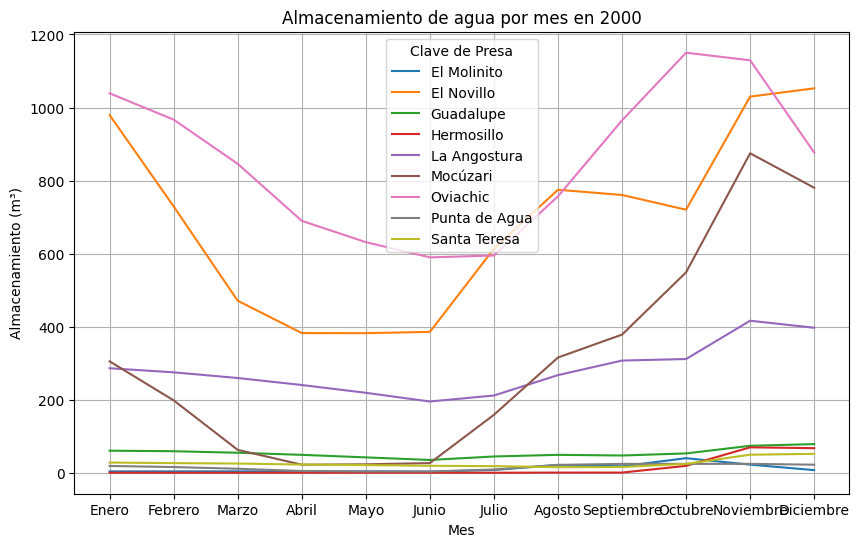

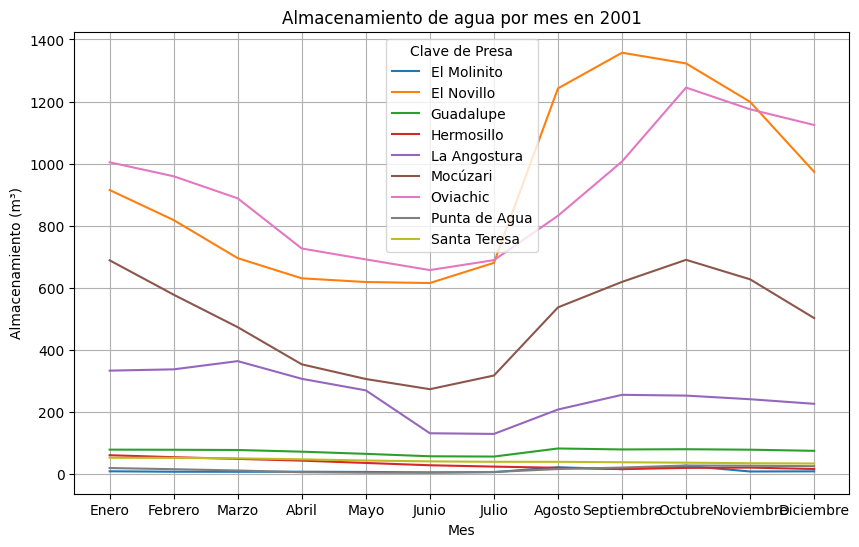

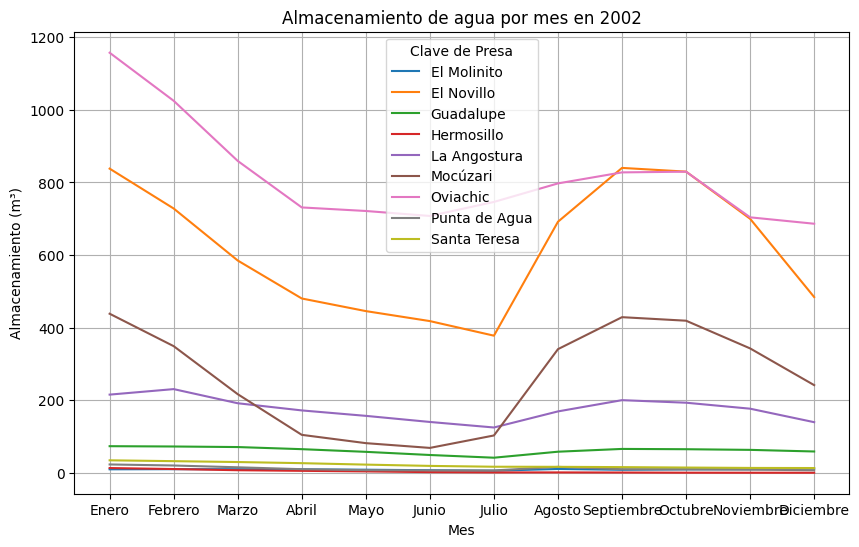

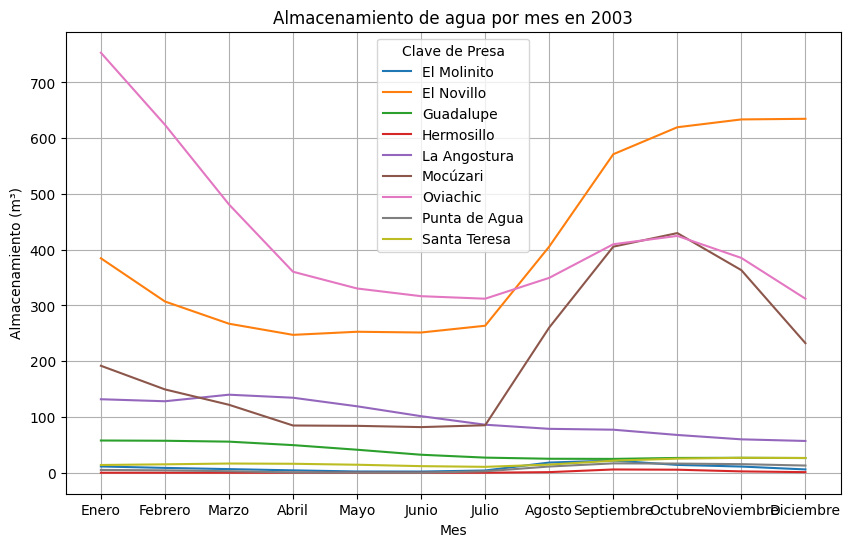

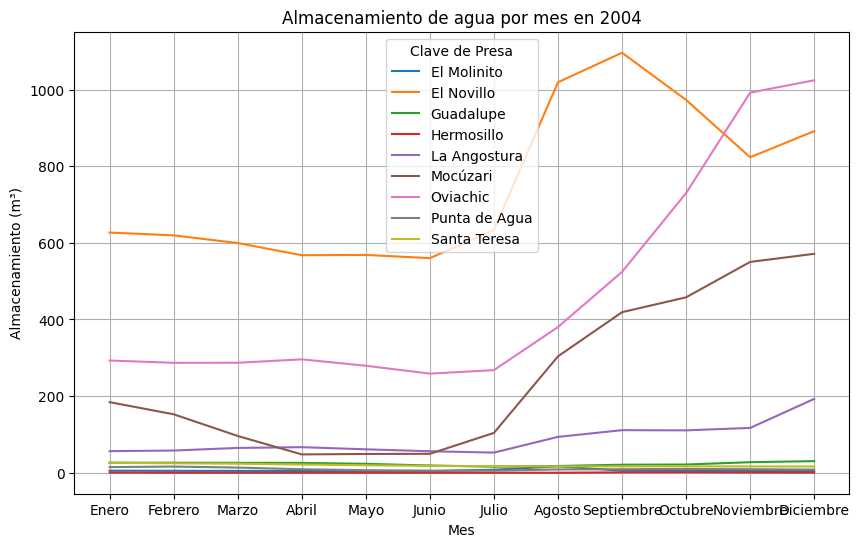

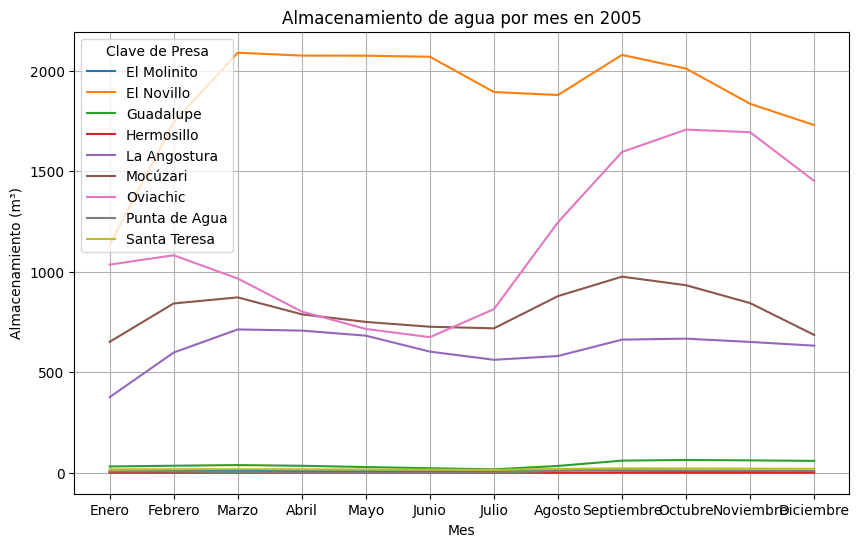

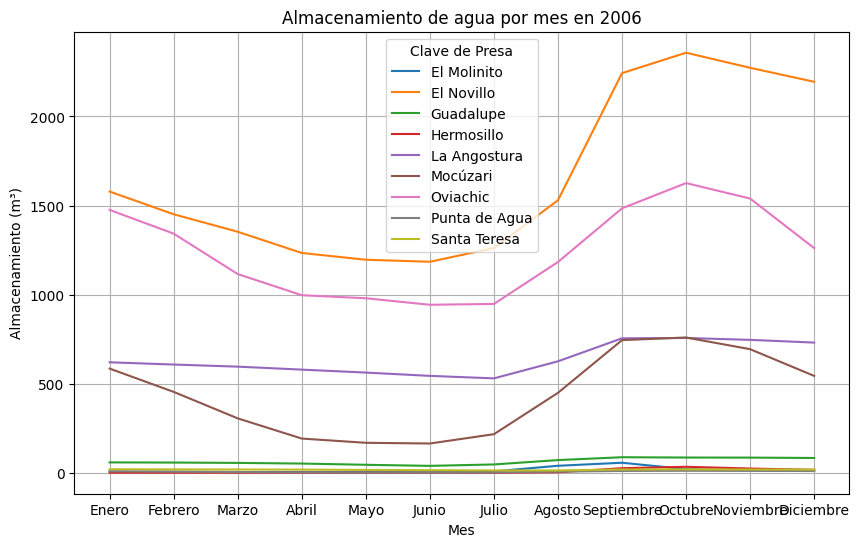

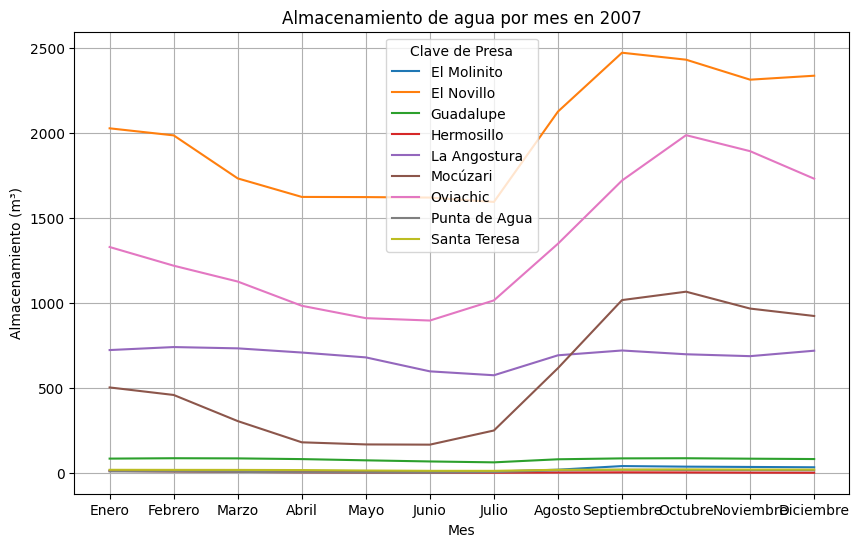

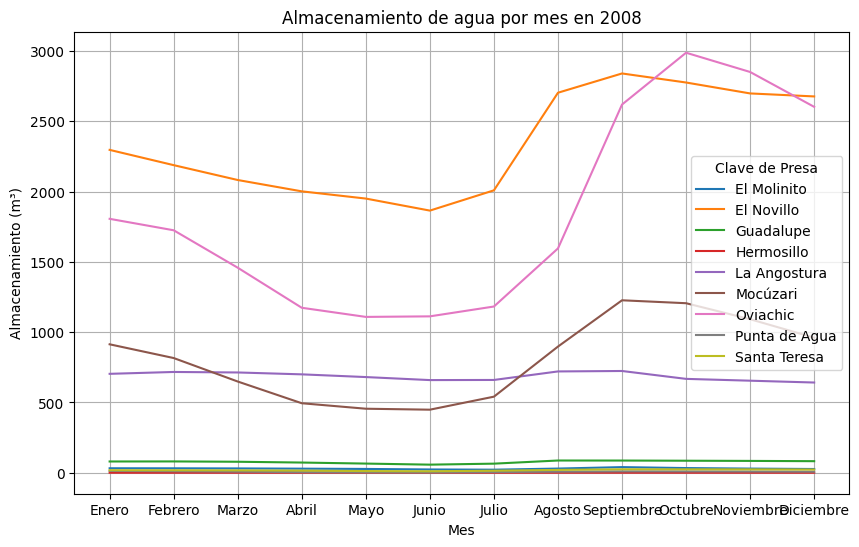

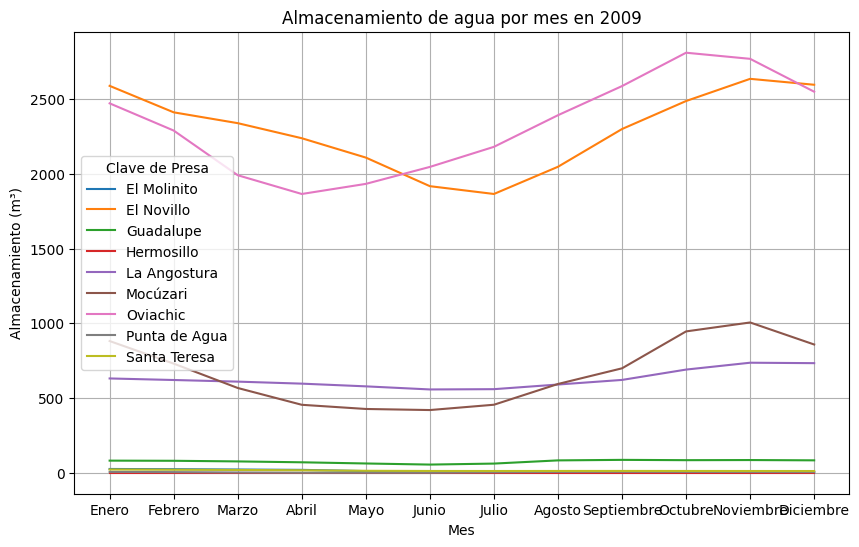

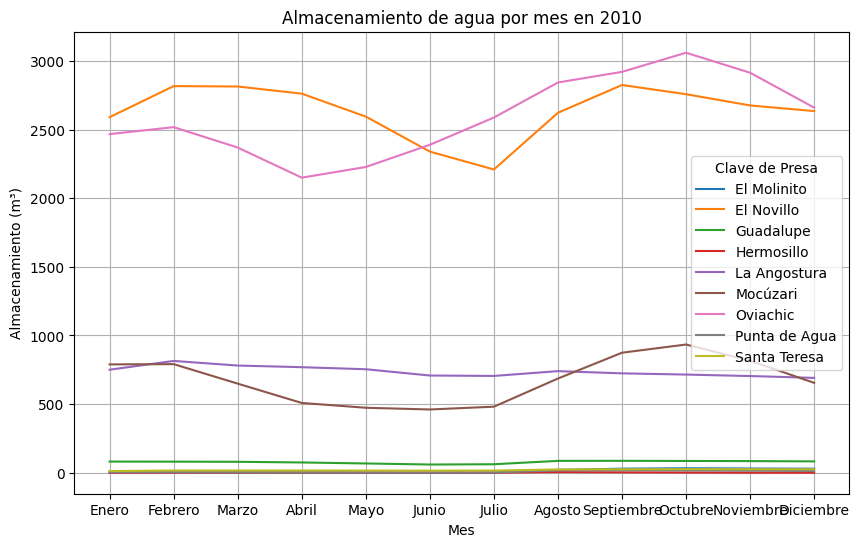

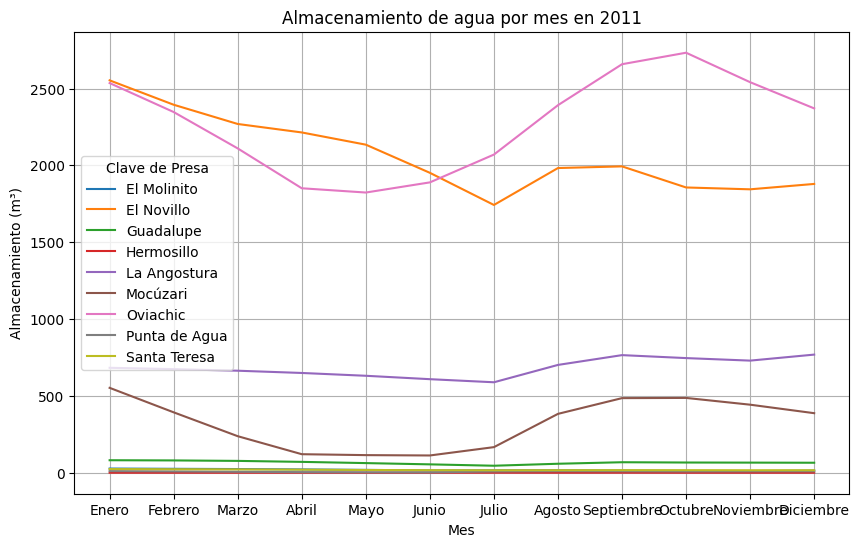

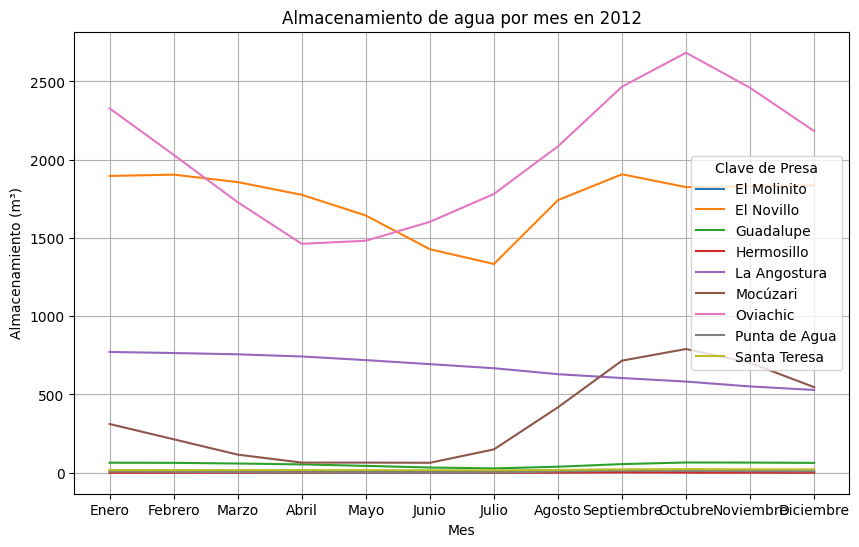

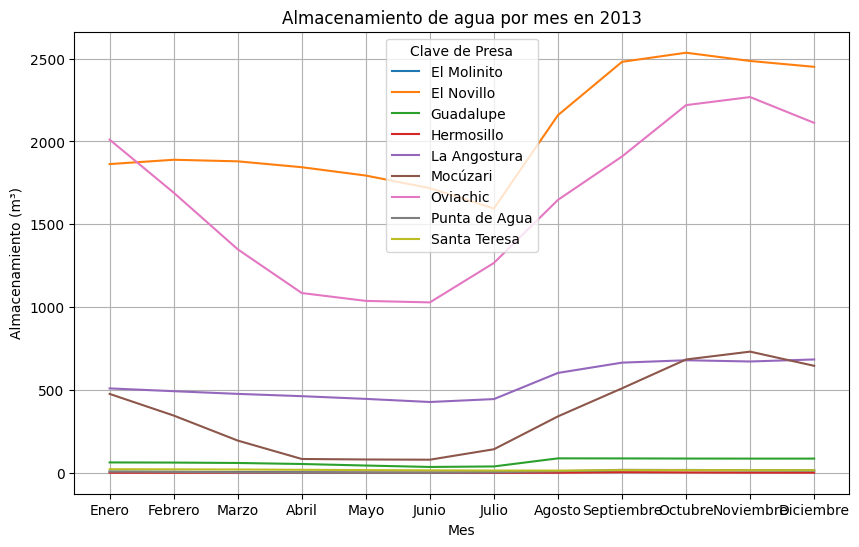

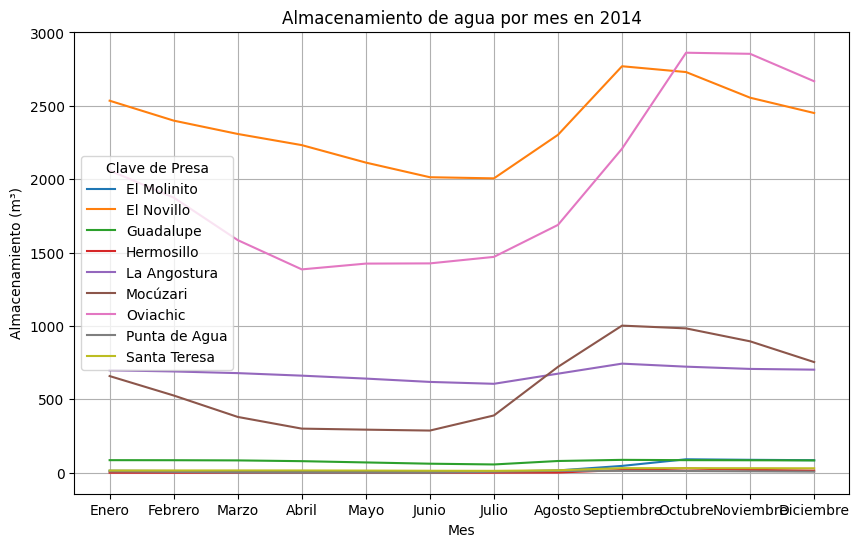

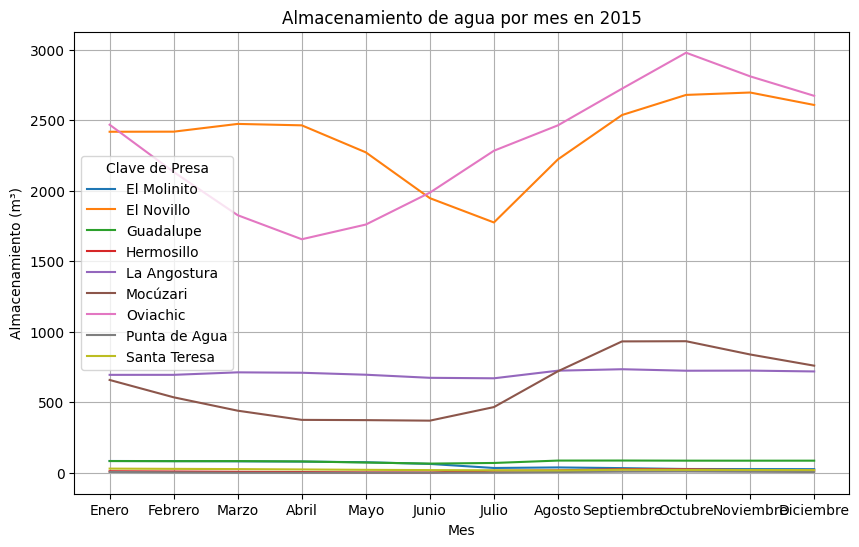

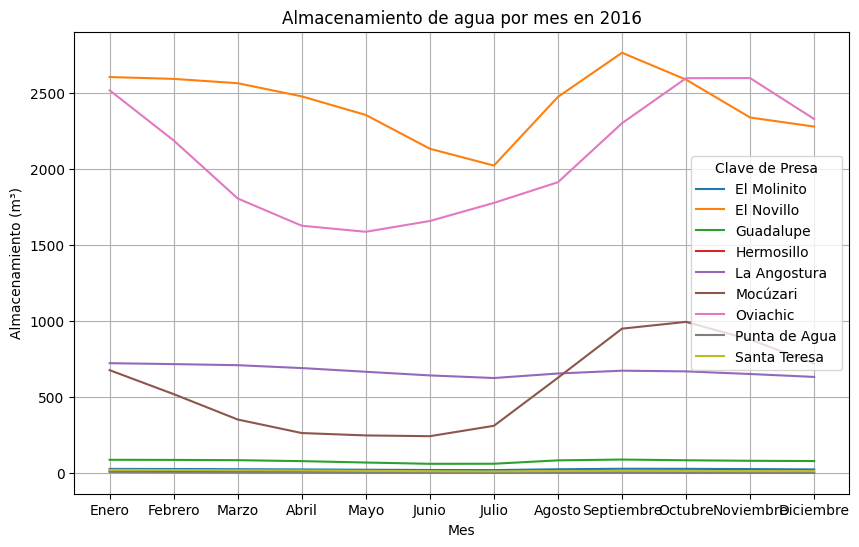

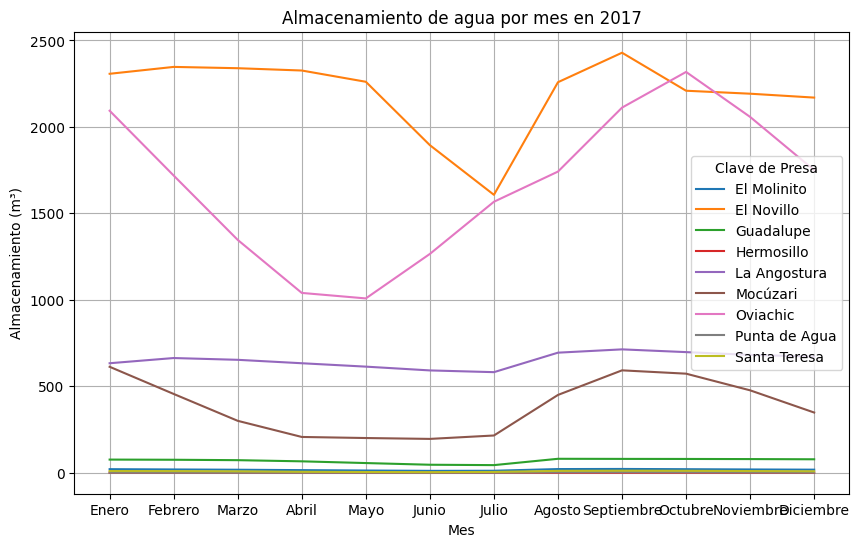

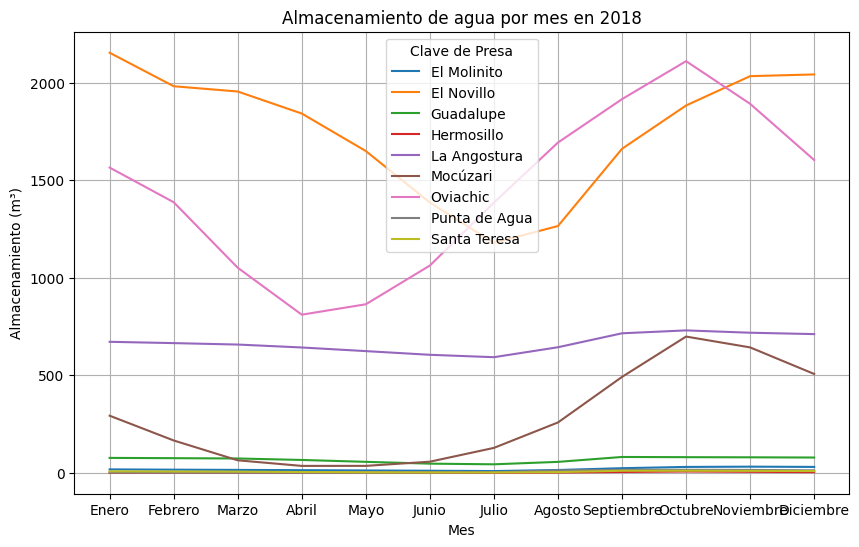

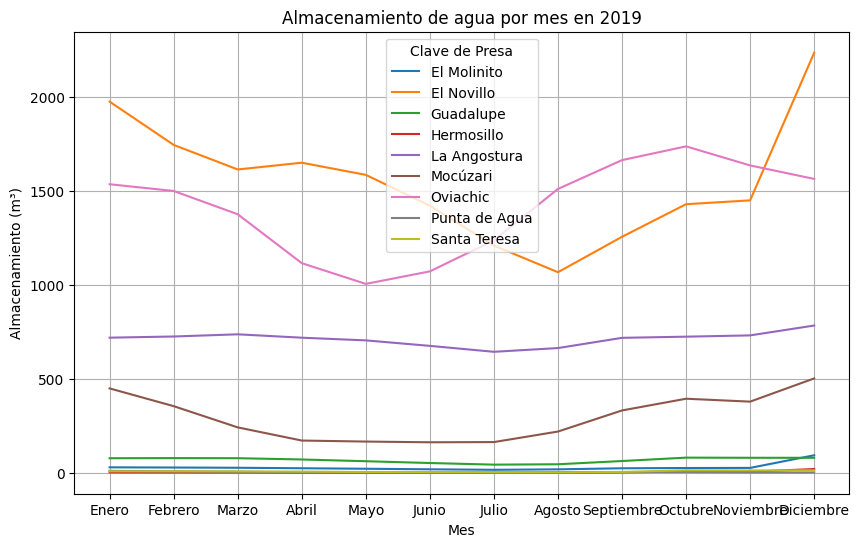

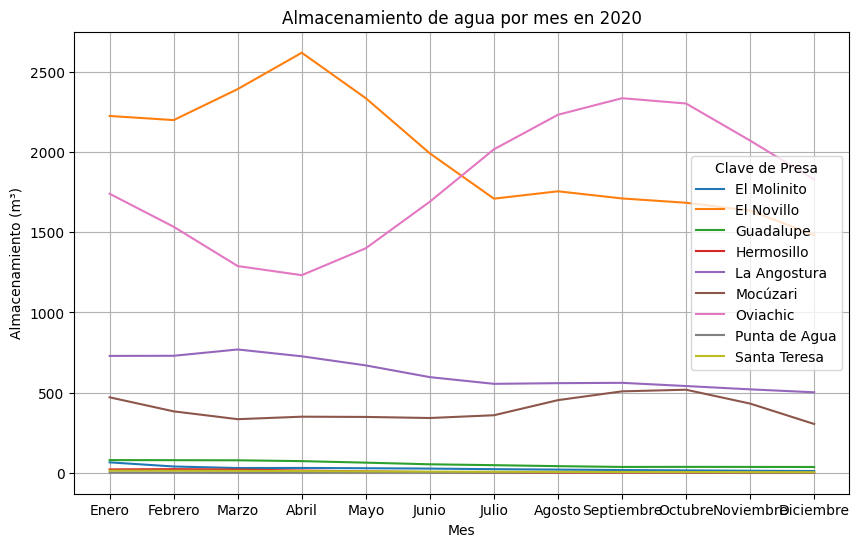

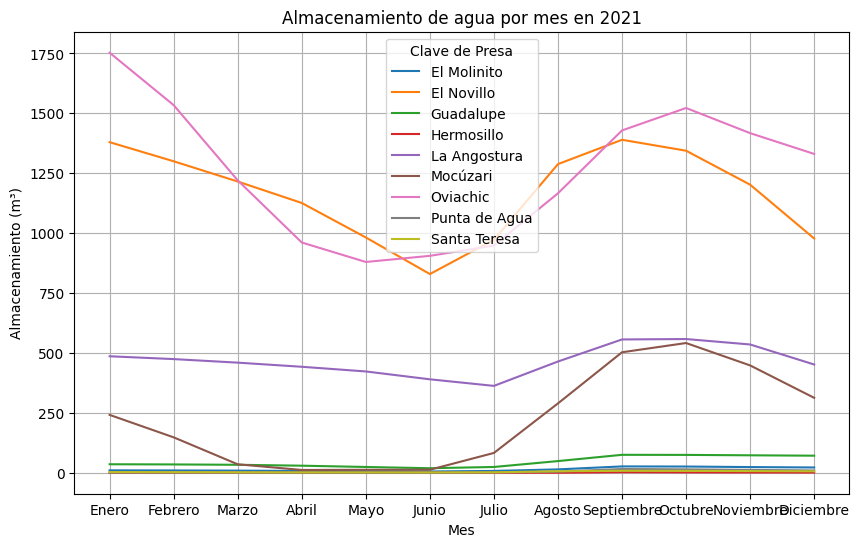

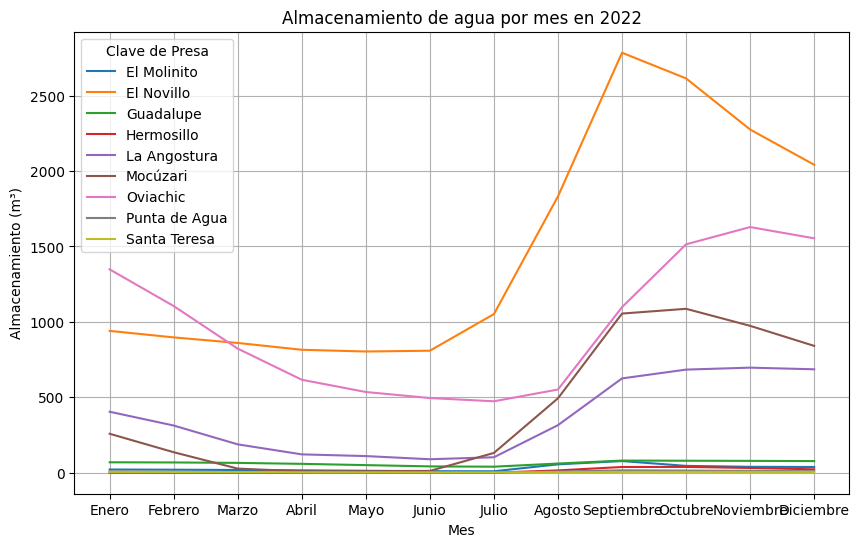

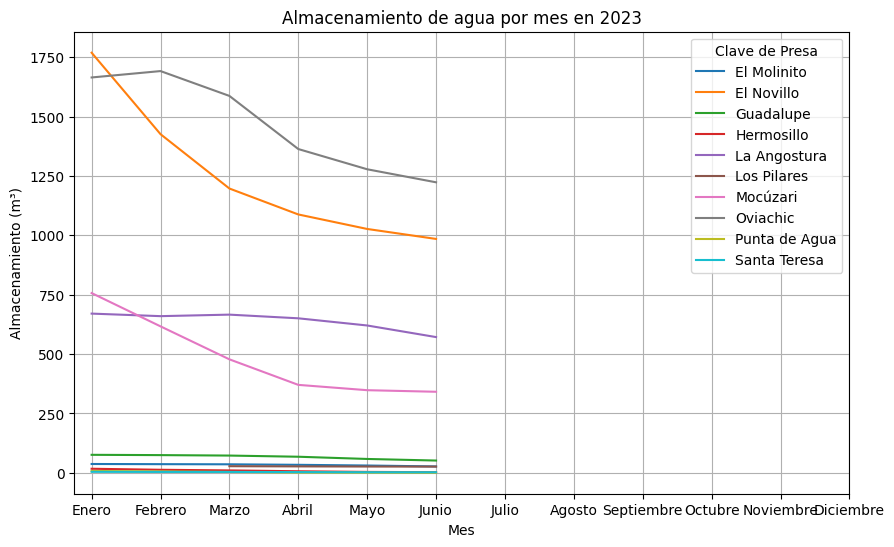

In [10]:

for año in años_unicos:
    df_año = almac[almac['año'] == año]  
    df_año.set_index('mes', inplace=True)
    df_año_grouped = df_año.groupby(['Nombre_comun', 'mes'])['almacenamiento'].mean().unstack('Nombre_comun')
    
    df_año_grouped.plot(figsize=(10,6))
    plt.title(f'Almacenamiento de agua por mes en {año}')
    plt.ylabel('Almacenamiento (m³)')
    plt.xlabel('Mes')
    plt.xticks(ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                                           'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
    plt.legend(title='Clave de Presa')
    plt.grid(True)
    plt.show()


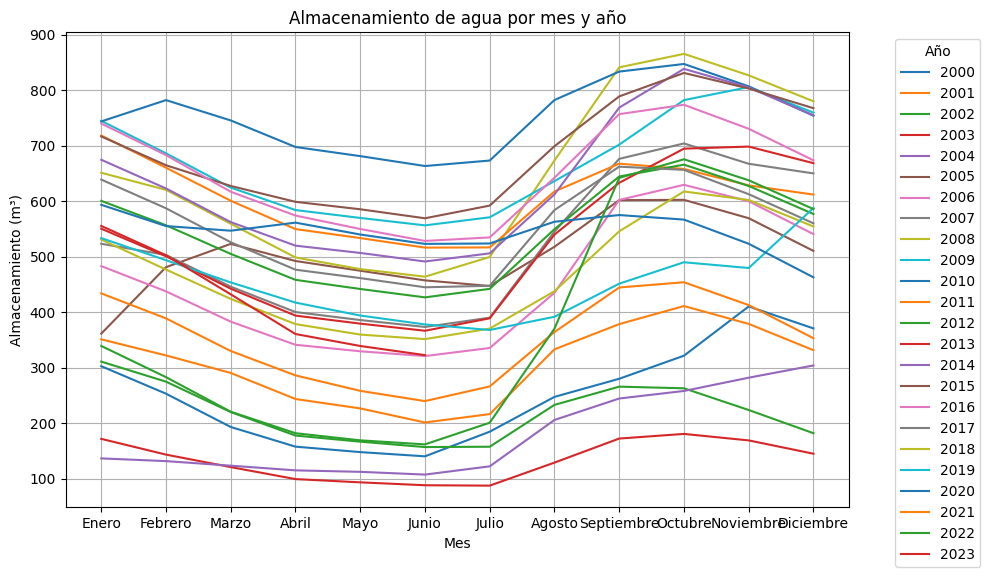

In [13]:
# df_suma = almac.groupby(['año', 'mes'])['almacenamiento'].sum().unstack('año')

df_media = almac.groupby(['año', 'mes'])['almacenamiento'].mean().unstack('año')

df_plot = df_media  

df_plot.plot(figsize=(10, 6))
plt.title('Almacenamiento de agua por mes y año')
plt.ylabel('Almacenamiento (m³)') 
plt.xlabel('Mes')
plt.xticks(ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                                       'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  
plt.show()


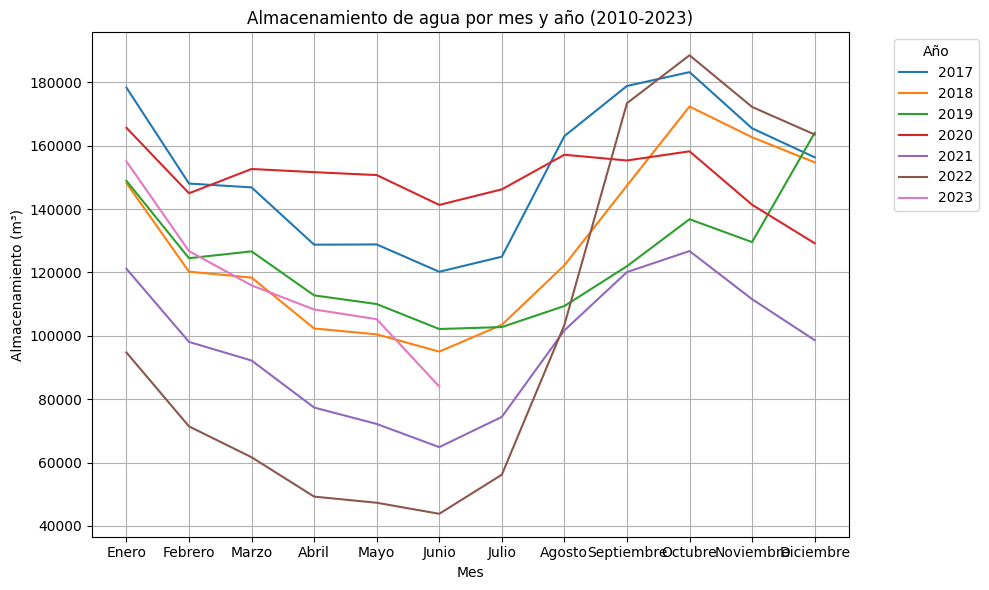

In [19]:
# Filtrar los datos de 2010 a 2023
almac = almac[(almac['año'] >= 2017) & (almac['año'] <= 2023)]

df_suma = almac.groupby(['año', 'mes'])['almacenamiento'].sum().unstack('año')

fig, ax = plt.subplots(figsize=(10, 6))
for idx, año in enumerate(df_suma.columns):
    ax.plot(df_suma.index, df_suma[año], label=año)

ax.set_title('Almacenamiento de agua por mes y año (2010-2023)')
ax.set_ylabel('Almacenamiento (m³)')
ax.set_xlabel('Mes')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
ax.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)
plt.tight_layout()
plt.show()
